# ノック71 - 人間関係のネットワークの可視化(ここから自身の解答)

In [109]:
import pandas as pd

あるブランドのSNS上での影響力を分析していく。  
SNS上での顧客同士のつながりや使用率のデータを用いていく。

まずは使用する全データを読み込む。

In [235]:
# リピーターがSNSのリピーター同士で繋がっているかどうか(20人のみ)
# つながっている場合は1

twenty = pd.read_csv("links.csv")
twenty = twenty.pivot_table(index = "Unnamed: 0")
twenty.head()

,Node0,Node1,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
Node0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Node11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
# SNSのリピーター同士で繋がっているかどうか(全リピーター540人)

all_mem = pd.read_csv("links_members.csv")
all_mem.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [112]:
# リピーターが月毎にSNSにログインしているかどうか
# ログインしている時は1

info = pd.read_csv("info_members.csv")
info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


次に、networkxを用いてtwentyのつながりを可視化していく。

In [113]:
import networkx as nx
from itertools import product 

In [114]:
twenty.head()

,Node0,Node1,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
Node0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Node11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [215]:
# index, columnsから"Node"という文字を省く

twenty = twenty.rename(index = lambda x: x.replace("Node", ""),columns = lambda x: x.replace("Node", ""))
twenty.head()

,0,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [232]:
# nodes同士のつながり(枝)のリストを作る

result_list = list([])

for i in range(len(twenty)):
    nodes_list = twenty.loc[twenty.iloc[i,:] == 1, twenty.index[i]].index
    nodes_combi = list(product(twenty.index[i], nodes_list))
    result_list = result_list + nodes_combi
result_list

[('0', '15'),
 ('0', '5'),
 ('1', '11'),
 ('1', '13'),
 ('1', '16'),
 ('1', '5'),
 ('1', '11'),
 ('1', '2'),
 ('1', '4'),
 ('1', '7'),
 ('0', '11'),
 ('0', '2'),
 ('0', '4'),
 ('0', '7'),
 ('1', '1'),
 ('1', '10'),
 ('1', '1'),
 ('1', '10'),
 ('1', '13'),
 ('1', '16'),
 ('1', '9'),
 ('2', '13'),
 ('2', '16'),
 ('2', '9'),
 ('1', '1'),
 ('1', '12'),
 ('1', '18'),
 ('1', '8'),
 ('3', '1'),
 ('3', '12'),
 ('3', '18'),
 ('3', '8'),
 ('1', '8'),
 ('4', '8'),
 ('1', '0'),
 ('1', '19'),
 ('1', '3'),
 ('1', '4'),
 ('5', '0'),
 ('5', '19'),
 ('5', '3'),
 ('5', '4'),
 ('1', '1'),
 ('1', '12'),
 ('1', '17'),
 ('6', '1'),
 ('6', '12'),
 ('6', '17'),
 ('1', '16'),
 ('1', '18'),
 ('1', '6'),
 ('1', '7'),
 ('7', '16'),
 ('7', '18'),
 ('7', '6'),
 ('7', '7'),
 ('1', '13'),
 ('1', '17'),
 ('1', '5'),
 ('8', '13'),
 ('8', '17'),
 ('8', '5'),
 ('1', '15'),
 ('9', '15'),
 ('2', '10'),
 ('2', '4'),
 ('2', '5'),
 ('2', '6'),
 ('3', '15'),
 ('3', '7'),
 ('4', '10'),
 ('4', '15'),
 ('4', '2'),
 ('4', '7'),
 (

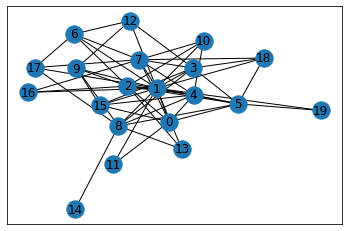

In [233]:
# networkxを用いて可視化する

G = nx.Graph()
G.add_nodes_from(twenty.columns[i] for i in range(len(twenty.columns)))
G.add_edges_from(result_list)
nx.draw_networkx(G)